In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset/Finance_data.csv')
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

In [7]:
df.columns.tolist()

['gender',
 'age',
 'Investment_Avenues',
 'Mutual_Funds',
 'Equity_Market',
 'Debentures',
 'Government_Bonds',
 'Fixed_Deposits',
 'PPF',
 'Gold',
 'Stock_Marktet',
 'Factor',
 'Objective',
 'Purpose',
 'Duration',
 'Invest_Monitor',
 'Expect',
 'Avenue',
 'What are your savings objectives?',
 'Reason_Equity',
 'Reason_Mutual',
 'Reason_Bonds',
 'Reason_FD',
 'Source']

In [8]:
# Cleaning
df.rename(columns={
    'Stock_Marktet': 'Stock_Market', 
    'What are your savings objectives?': 'Savings_Objectives', 
    'Investment_Avenues': 'Invest_YesNo'
}, inplace=True)

print("Updated Columns:")
print(df.columns.tolist())

rank_cols = ['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']
is_ranking = df[rank_cols].apply(lambda x: sorted(x.values) == [1, 2, 3, 4, 5, 6, 7], axis=1).all()

print(f"\nAre investment columns strict rankings (1-7)? {is_ranking}")

Updated Columns:
['gender', 'age', 'Invest_YesNo', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'Stock_Market', 'Factor', 'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect', 'Avenue', 'Savings_Objectives', 'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source']

Are investment columns strict rankings (1-7)? True


In [11]:
expect_map = {
    '10%-20%': 15,
    '20%-30%': 25,
    '30%-40%': 35
}
df['Expect_Numeric'] = df['Expect'].map(expect_map)

binary_map = {'Yes': 1, 'No': 0}
df['Invest_YesNo'] = df['Invest_YesNo'].map(binary_map)
df['Stock_Market'] = df['Stock_Market'].map(binary_map)

print("--- Data Quality Check ---")
print(f"NaNs in Expect_Numeric: {df['Expect_Numeric'].isna().sum()}")
print(f"NaNs in Invest_YesNo:   {df['Invest_YesNo'].isna().sum()}")

print("\n--- Transformed Columns Head ---")
print(df[['Expect', 'Expect_Numeric', 'Invest_YesNo', 'Stock_Market']].head())

--- Data Quality Check ---
NaNs in Expect_Numeric: 0
NaNs in Invest_YesNo:   40

--- Transformed Columns Head ---
    Expect  Expect_Numeric  Invest_YesNo  Stock_Market
0  20%-30%              25           NaN           NaN
1  20%-30%              25           NaN           NaN
2  20%-30%              25           NaN           NaN
3  10%-20%              15           NaN           NaN
4  20%-30%              25           NaN           NaN


In [ ]:
# 1. Rename columns 
df.rename(columns={
    'Stock_Marktet': 'Stock_Market',
    'What are your savings objectives?': 'Savings_Objectives',
    'Investment_Avenues': 'Invest_YesNo'
}, inplace=True)

# 2. Convert 'Expect' to Numeric
expect_map = {'10%-20%': 15, '20%-30%': 25, '30%-40%': 35}
df['Expect_Numeric'] = df['Expect'].str.strip().map(expect_map)

# 3. Clean and Map Binary Columns
binary_map = {'Yes': 1, 'No': 0}

cols_to_fix = ['Invest_YesNo', 'Stock_Market']
for col in cols_to_fix:
    df[col] = df[col].astype(str).str.strip().map(binary_map)

# 4. Verify Cleanliness
print("--- Final Check ---")
print(f"NaNs in Invest_YesNo: {df['Invest_YesNo'].isna().sum()}")
print(f"NaNs in Stock_Market: {df['Stock_Market'].isna().sum()}")
print(f"NaNs in Expect_Numeric: {df['Expect_Numeric'].isna().sum()}")

# 5. Save the clean data
df.to_csv('Dataset/Finance_data_Cleaned.csv', index=False)

--- Final Check ---
NaNs in Invest_YesNo: 0
NaNs in Stock_Market: 0
NaNs in Expect_Numeric: 0


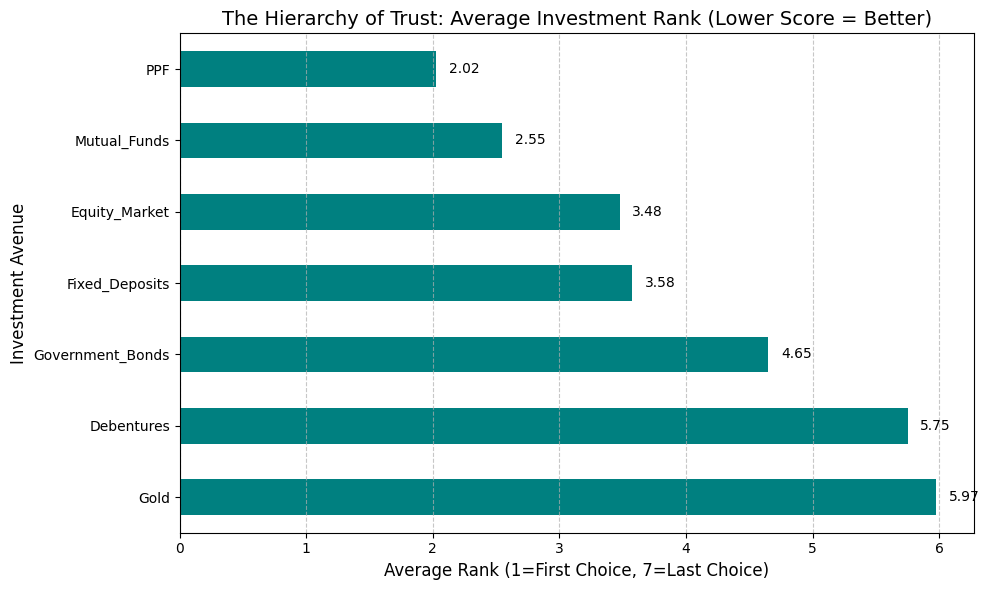

In [16]:
df = pd.read_csv('Dataset/Finance_data_Cleaned.csv')

# Columns representing the ranks
rank_cols = ['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

# Calculate the average rank for each investment avenue
rank_means = df[rank_cols].mean().sort_values(ascending=True)

# Visualization
plt.figure(figsize=(10, 6))
rank_means.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title('The Hierarchy of Trust: Average Investment Rank (Lower Score = Better)', fontsize=14)
plt.xlabel('Average Rank (1=First Choice, 7=Last Choice)', fontsize=12)
plt.ylabel('Investment Avenue', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels
for index, value in enumerate(rank_means.sort_values(ascending=False)):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center')

plt.tight_layout()

(0.0, 7.0)

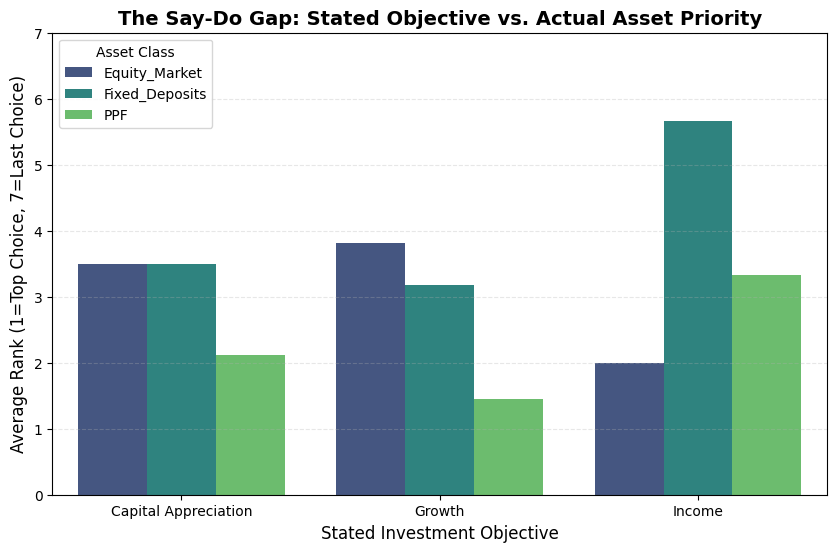

In [27]:
gap_analysis = df.groupby('Objective')[['Equity_Market', 'Fixed_Deposits', 'PPF']].mean()

plt.figure(figsize=(10, 6))
gap_melted = gap_analysis.reset_index().melt(id_vars='Objective', var_name='Asset_Class', value_name='Average_Rank')

sns.barplot(data=gap_melted, x='Objective', y='Average_Rank', hue='Asset_Class', palette='viridis')

plt.title('The Say-Do Gap: Stated Objective vs. Actual Asset Priority', fontsize=14, fontweight='bold')
plt.xlabel('Stated Investment Objective', fontsize=12)
plt.ylabel('Average Rank (1=Top Choice, 7=Last Choice)', fontsize=12)
plt.legend(title='Asset Class')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.ylim(0, 7)
